In [1]:
%pylab inline
from scipy import *
from scipy import optimize
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def CPB(E_C, E_J, Q_dim, Q_offset,gridsize=40):
    """
    Plot E01, E02 versus offset charge ng
    Q_dim : dimension of charge basis
    Q_offset : the minimum charge starts at - Q_offset
                e.g. : Q_dim = 3, Q_offset = -1
                        the charge basis is -1,0,1
    """
    Q_list = np.arange(Q_dim)-Q_offset

    Q = np.diag(Q_list).astype(np.complex)

    Q_ = np.zeros((Q_dim,Q_dim)).astype(np.complex)
    for m in range(0,Q_dim):
        for n in range(0,Q_dim):
            Q_[m,n]=mod_kron(m+1,n)+mod_kron(m-1,n)

    spectrum = np.zeros((gridsize,4))
    i=0
    for ng in np.linspace(np.min(Q_list),np.max(Q_list),gridsize):
        H = 4*E_C * np.diag((Q_list-ng)**2) - 1/2*E_J * Q_
    #print_matrix(H)

        evals, evecs = solve_eigenproblem(H)
        evals = evals.real
        energy = evals[0:3]
        spectrum[i,0]=ng
        spectrum[i,1:]=energy
        i+=1

    plt.plot(spectrum[:,0],spectrum[:,1],'o-')
    plt.plot(spectrum[:,0],spectrum[:,2],'o-')
    plt.plot(spectrum[:,0],spectrum[:,3],'o-')
    

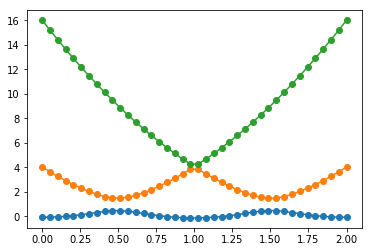

In [3]:
CPB(E_C=1,E_J=1, Q_dim=3, Q_offset=0,gridsize=40)

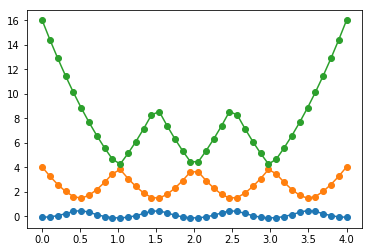

In [4]:
CPB(E_C=1,E_J=1, Q_dim=5, Q_offset=0,gridsize=40)

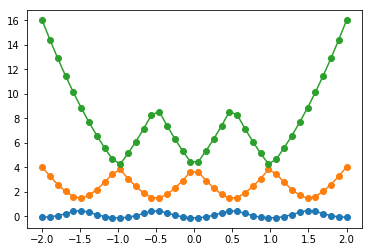

In [6]:
CPB(E_C=1,E_J=1, Q_dim=5, Q_offset=2,gridsize=40)